In [1]:
#import dependencies
import os
import csv
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
#read state unemployment csv ('state_unemployment.csv')
unemploy_df = pd.read_csv("Resources/state_unemployment.csv")
pop_df = pd.read_csv('Clean_Data_Output/Population_Data.csv')

In [3]:
pop_df = pop_df[["State", "Population (2019)", "Total Murders (2019)"]]
pop_df

,State,Population (2019),Total Murders (2019)
0,Alabama,731545,4
1,Alaska,7278717,69
2,Arizona,3017804,337
3,Arkansas,39512223,231
4,California,5758736,1679
5,Colorado,3565287,209
6,Connecticut,973764,104
7,Delaware,705749,48
8,District of Columbia,21477737,166
9,Florida,10617423,1


In [4]:
#set variable 'bottom_five' to 5 lowest state unemployment rates
bottom_five = unemploy_df.sort_values("unemployment_rate").head(5)
#display 'bottom_five'
bottom_five

,State,unemployment_rate
45,Vermont,2.3
44,Utah,2.3
40,South Carolina,2.3
34,North Dakota,2.4
5,Colorado,2.5


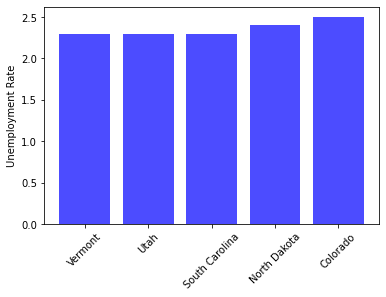

In [5]:
#plot 5 lowest state unemployment rates as histogram
U_rate = bottom_five["unemployment_rate"]
x_axis = bottom_five["State"]
plt.bar(x_axis, U_rate, color='b', alpha=0.70, align="center")
plt.xticks(rotation = 45)
plt.ylabel('Unemployment Rate')
plt.show()

In [6]:
#set variable 'top_five' to 5 highest state unemployment rates
top_five = unemploy_df.sort_values("unemployment_rate",ascending=False).head(5)
#display 'top_five'
top_five

,State,unemployment_rate
1,Alaska,6.0
24,Mississippi,5.7
8,District of Columbia,5.3
48,West Virginia,5.0
18,Louisiana,4.9


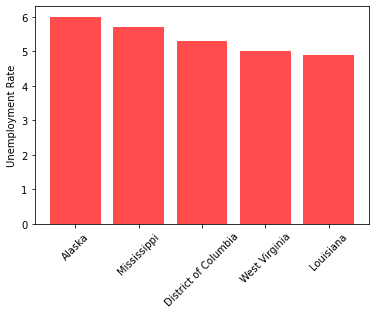

In [7]:
#plot 5 highest state unemployment rates as histogram
U_rate = top_five["unemployment_rate"]
x_axis = top_five["State"]
plt.bar(x_axis, U_rate, color='r', alpha=0.70, align="center")
plt.xticks(rotation = 45)
plt.ylabel('Unemployment Rate')
plt.show()

In [8]:
unemploy_homicide_df = unemploy_df
unemploy_homicide_df['Total Murders (2019)'] = pop_df['Total Murders (2019)']
unemploy_homicide_df.head()

,State,unemployment_rate,Total Murders (2019)
0,Alabama,2.7,4
1,Alaska,6.0,69
2,Arizona,4.6,337
3,Arkansas,3.6,231
4,California,3.9,1679


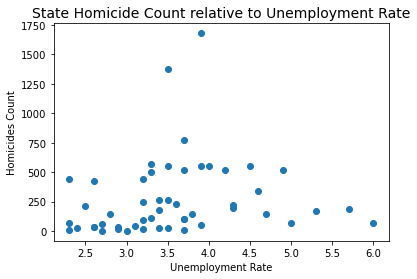

In [9]:
#plot state unemploymnet rate in relaiton to total state homicides as scatterplot
plt.scatter(unemploy_homicide_df["unemployment_rate"], unemploy_homicide_df["Total Murders (2019)"])
plt.title('State Homicide Count relative to Unemployment Rate',fontsize =14)
plt.xlabel('Unemployment Rate',fontsize =10)
plt.ylabel('Homicides Count',fontsize =10)
plt.savefig("Image Output/Unemployment.png")

The r-squared is: 0.023421047777448953


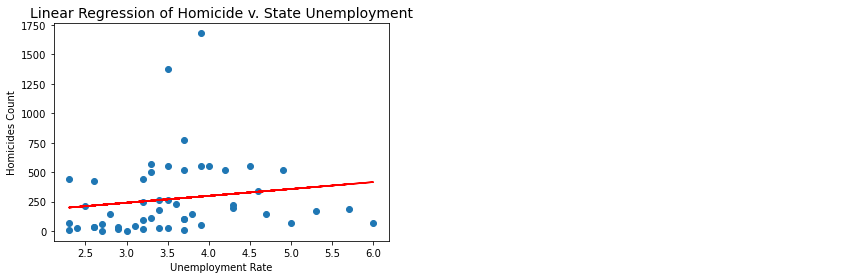

In [10]:
 # Add the linear regression equation and line to plot
x_values = unemploy_homicide_df['unemployment_rate']
y_values = unemploy_homicide_df['Total Murders (2019)']

#set linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#displaying linear regression of Homicide Count & State Unemplyment
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title('Linear Regression of Homicide v. State Unemployment',fontsize =14)
plt.xlabel('Unemployment Rate',fontsize =10)
plt.ylabel('Homicides Count',fontsize =10)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Image Output/Unemployment_Regression.png")
plt.show()

In [11]:
abbrev_list = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
              'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
              'MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
              'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
              'VA','WA','WV','WI','WY']

In [12]:
unemploy_multibar_df = unemploy_homicide_df
unemploy_multibar_df['Abbreviations'] = abbrev_list
unemploy_multibar_df = unemploy_multibar_df[['Abbreviations','unemployment_rate','Total Murders (2019)']]
#unemploy_multibar_df['unemployment_rate'] = (unemploy_multibar_df['unemployment_rate']/100).map('{:.1%}'.format)
unemploy_multibar_df.head()

,Abbreviations,unemployment_rate,Total Murders (2019)
0,AL,2.7,4
1,AK,6.0,69
2,AZ,4.6,337
3,AR,3.6,231
4,CA,3.9,1679


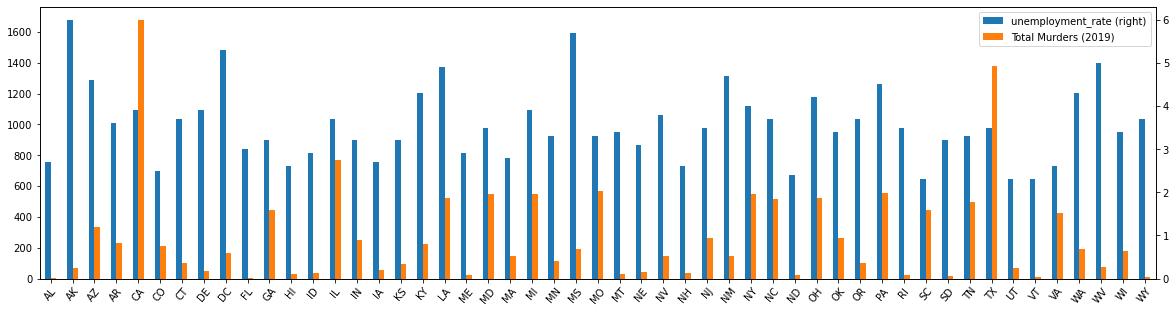

<Figure size 432x288 with 0 Axes>

In [13]:
multi_plot = unemploy_multibar_df.plot(kind="bar", secondary_y = ['unemployment_rate'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(unemploy_multibar_df['Abbreviations'], rotation=50)
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax)

plt.show()
plt.tight_layout()